# Basic Training Pipeline
Building a neural network with fundamental pipeline

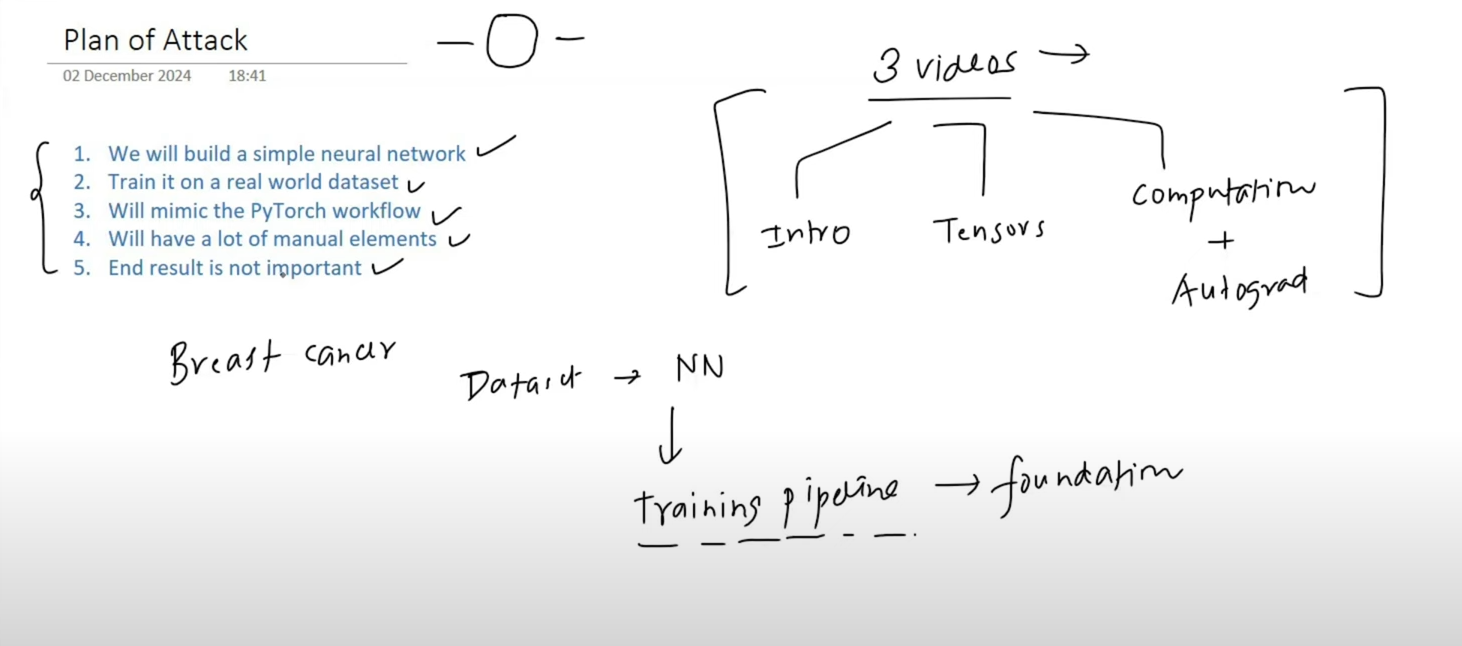  

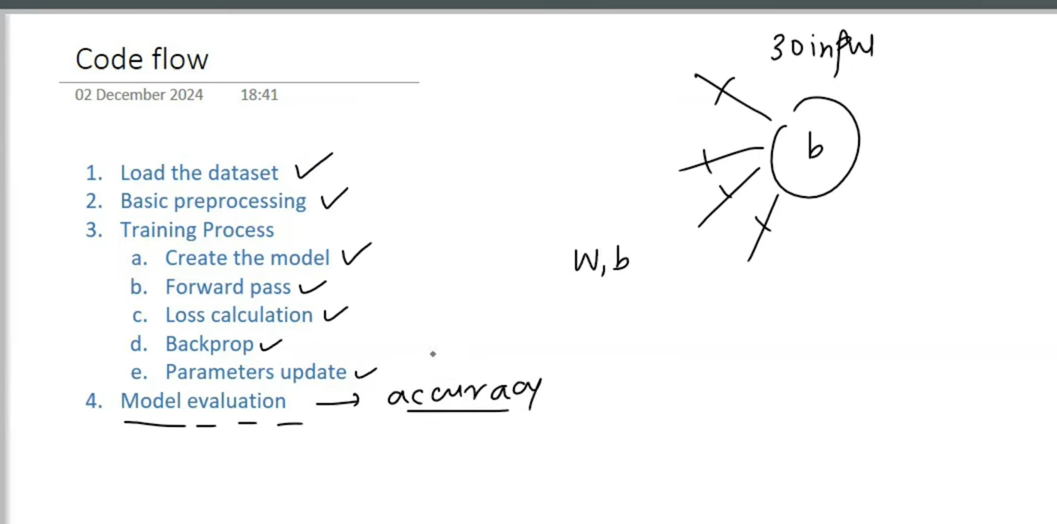

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

# Train test split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

# Scaling
In neural network , input should be of same scale

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[-0.75994143, -1.11446312, -0.75045052, ..., -0.59944994,
         0.07516755,  0.47380806],
       [-0.56799318, -0.35655767, -0.59700176, ..., -0.8318882 ,
        -1.06258958, -0.5476719 ],
       [ 0.9008282 ,  4.64328626,  0.84097464, ...,  1.38565377,
        -0.06506022,  0.08650634],
       ...,
       [-1.24927037, -0.93956186, -1.1627431 , ...,  0.64287175,
         0.34128161,  2.40465432],
       [ 0.16085379, -0.39853398,  0.1334951 , ..., -0.46784998,
         1.12528232, -0.59919888],
       [ 1.17623221,  0.59257315,  1.11556715, ...,  0.35476236,
         0.34287511, -0.41517395]])

In [ ]:
X_test

array([[-0.69039496, -1.09114295, -0.65676601, ..., -0.12992167,
        -0.46184107,  0.86960323],
       [-0.19800597, -0.11169591, -0.18067105, ...,  0.46580452,
        -0.36304423, -0.37214042],
       [ 1.52118268,  0.43866004,  1.51130342, ...,  1.93186116,
         1.14599778,  0.23485875],
       ...,
       [-0.52904716, -1.62750681, -0.55419763, ..., -0.30533827,
        -0.10649115, -0.8902414 ],
       [-0.07838605, -1.4456095 , -0.09142848, ..., -0.19144503,
        -1.1693539 , -0.61731826],
       [-1.16609279,  0.44565609, -1.18656804, ..., -1.32752638,
        -0.8681829 , -0.15980396]])

In [ ]:
y_train

,diagnosis
478,B
96,B
239,M
499,M
10,M
...,...
185,B
36,M
152,B
447,B


# Label Encoding

In [ ]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

In [ ]:
y_train

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,

### Numpy arrays to PyTorch tensors

In [ ]:
X_train_tensor=torch.from_numpy(X_train)
X_test_tensor=torch.from_numpy(X_test)
y_train_tensor=torch.from_numpy(y_train)
y_test_tensor=torch.from_numpy(y_test)

In [ ]:
X_test

array([[-0.69039496, -1.09114295, -0.65676601, ..., -0.12992167,
        -0.46184107,  0.86960323],
       [-0.19800597, -0.11169591, -0.18067105, ...,  0.46580452,
        -0.36304423, -0.37214042],
       [ 1.52118268,  0.43866004,  1.51130342, ...,  1.93186116,
         1.14599778,  0.23485875],
       ...,
       [-0.52904716, -1.62750681, -0.55419763, ..., -0.30533827,
        -0.10649115, -0.8902414 ],
       [-0.07838605, -1.4456095 , -0.09142848, ..., -0.19144503,
        -1.1693539 , -0.61731826],
       [-1.16609279,  0.44565609, -1.18656804, ..., -1.32752638,
        -0.8681829 , -0.15980396]])

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

In [ ]:
y_train_tensor.shape

torch.Size([455])

In [ ]:
X_train.shape[1]

30

In [ ]:
X_train_tensor = X_train_tensor.float()
y_train_tensor = y_train_tensor.float()
X_test_tensor = X_test_tensor.float()
y_test_tensor = y_test_tensor.float()

## Define Model

In [ ]:
import torch.nn as nn
class MySimpleNN(nn.Module):

  def __init__(self,num_features):

      super().__init__()
      self.linear1 = nn.Linear(num_features,1)
      self.sigmoid = nn.Sigmoid()

  def forward(self,features):

      out = self.linear1(features)
      out = self.sigmoid(out)
      return out

In [ ]:
## defining loss function
loss_function=nn.BCELoss()

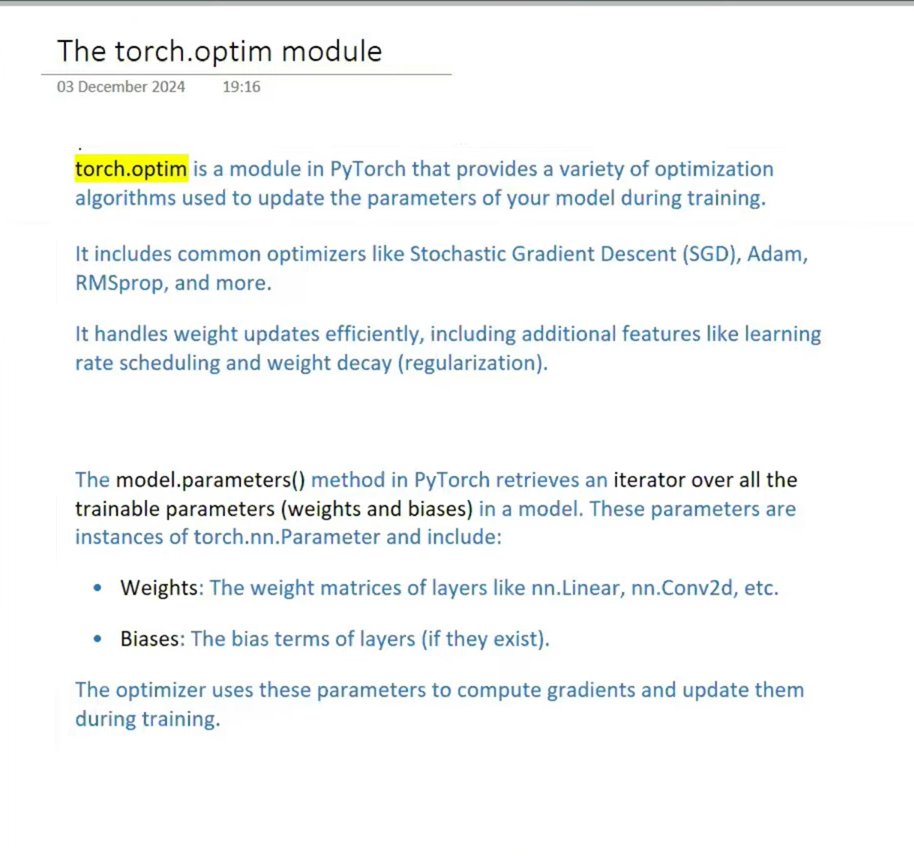

In [ ]:
## IMPORTANT PARAMETERS
learning_rate=0.1
epochs=25

## Training Pipeline

In [ ]:
## creating model
model=MySimpleNN(X_train_tensor.shape[1])

## define optimizer
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

## define loop
for epochs in range(epochs):

  ## forward pass
  y_pred=model(X_train_tensor)

  ## loss calculate
  loss=loss_function(y_pred,y_train_tensor.view(-1,1))

  ## Zero gradients
  optimizer.zero_grad()

  ## backward pass
  loss.backward()

  ## parameter update
  optimizer.step()

  ## Print loss in each epoch
  print(f'Epoch: {epochs+1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.7968363761901855
Epoch: 2, Loss: 0.5925498008728027
Epoch: 3, Loss: 0.48407626152038574
Epoch: 4, Loss: 0.4172864258289337
Epoch: 5, Loss: 0.3716888129711151
Epoch: 6, Loss: 0.3383658826351166
Epoch: 7, Loss: 0.31281527876853943
Epoch: 8, Loss: 0.29251256585121155
Epoch: 9, Loss: 0.27593013644218445
Epoch: 10, Loss: 0.26208794116973877
Epoch: 11, Loss: 0.2503272294998169
Epoch: 12, Loss: 0.2401883453130722
Epoch: 13, Loss: 0.23134015500545502
Epoch: 14, Loss: 0.22353775799274445
Epoch: 15, Loss: 0.21659593284130096
Epoch: 16, Loss: 0.2103717178106308
Epoch: 17, Loss: 0.20475299656391144
Epoch: 18, Loss: 0.1996503323316574
Epoch: 19, Loss: 0.19499166309833527
Epoch: 20, Loss: 0.19071796536445618
Epoch: 21, Loss: 0.18678057193756104
Epoch: 22, Loss: 0.183138906955719
Epoch: 23, Loss: 0.17975878715515137
Epoch: 24, Loss: 0.1766113042831421
Epoch: 25, Loss: 0.17367173731327057


In [ ]:
model.linear1.weight,model.linear1.bias

(Parameter containing:
 tensor([[ 0.1205,  0.0931,  0.1799,  0.3584,  0.1219, -0.0202,  0.3526,  0.2670,
           0.0867,  0.0179,  0.0688,  0.1369,  0.2745,  0.2478, -0.1667,  0.0053,
          -0.1373,  0.1164, -0.0006, -0.0309,  0.3614,  0.0999,  0.3769,  0.2846,
           0.2633,  0.0284,  0.0511,  0.2152,  0.2845,  0.1358]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0756], requires_grad=True))

## Model Evaluation

In [ ]:
with torch.no_grad():
  y_pred=model.forward(X_test_tensor)
  y_pred=(y_pred>0.8).float()
  acc=(y_pred==y_test_tensor).float().mean()
  print(f'Accuracy: {acc}')

Accuracy: 0.5720221400260925
